In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Kagome')
from Kagome_Matrix_in_k_space import *

t1= -1 L1= 0.28 t2= 0.3 L2= 0.2


In [2]:
N1=8
N2=8
# izinli k noktaları
K=np.zeros((0,2))
for m1 in range(0,N1):
    for m2 in range(0,N2):
        K=np.append(K, [m1/N1*b1+m2/N2*b2], axis=0)

In [3]:
#################################################################
#### TIGHT-BINDING (L1=L2=0) ENERJİ DAĞILIMI KARŞILAŞTIRMASI ####
#################################################################

#SORU: Makaledeki matris ile tight-binding çözümleri birbirleriyle tutarlı mı?

# izinli k noktalarından herhangi bir tanesi için tight-binding enerji dağınımı 
kx=K[1,0]; ky=K[1,1]
k1=kx; k2=kx/2+ky*np.sqrt(3)/2; k3=k2-k1

E1= 2*t1
E2 = t1*( -1 + np.sqrt( 4*( (np.cos(k1))**2 + (np.cos(k2))**2 + (np.cos(k3))**2 ) -3 ) )
E3 = t1*( -1 - np.sqrt( 4*( (np.cos(k1))**2 + (np.cos(k2))**2 + (np.cos(k3))**2 ) -3 ) )

# yine aynı izinli k noktası için matrsi enerji dağınımı
E,U = np.linalg.eig(Hamiltonian(k1,k2,k3))

print(E1,",",E2,",",E3)
print(np.sort(np.real(E)))

#SONUÇ: Hamiltonian ile tight-binding enerjileri aynı.

-2 , -1.7979326519318133 , 3.7979326519318133
[-2.78265548  1.01448232  1.76817316]


In [8]:
###################################################################
#### RECİPROCAL VEKTÖRÜ KADAR TAŞINAN NOKTALARIN EŞDEĞERLİLİĞİ ####
###################################################################

#SORU: k uzayındaki noktalar hangi şartlarda eşdeğer?

kx_i=K[0,0]; ky_i=K[0,1] #başlangıç noktası
k1_i=kx_i; k2_i=kx_i/2+ky_i*np.sqrt(3)/2; k3_i=k2_i-k1_i

kx_f=kx_i-b1[0]; ky_f=ky_i-b1[1] #ötelenmiş nokta (b_i vektörleri kadar)
k1_f=kx_f; k2_f=kx_f/2+ky_f*np.sqrt(3)/2; k3_f=k2_f-k1_f

E_i,U_i = np.linalg.eig(Hamiltonian(k1_i,k2_i,k3_i))
E_f,U_f = np.linalg.eig(Hamiltonian(k1_f,k2_f,k3_f))

#k uzayında reciprocal vektörle ilişkisiz noktalar
kx_p1=K[0,0]; ky_p1=K[0,1] 
k1_p1=kx_p1; k2_p1=kx_p1/2+ky_p1*np.sqrt(3)/2; k3_p1=k2_p1-k1_p1

kx_p2=K[1,0]; ky_p2=K[1,1] 
k1_p2=kx_p2; k2_p2=kx_p2/2+ky_p2*np.sqrt(3)/2; k3_p2=k2_p2-k1_p2

E_p1,U_p1 = np.linalg.eig(Hamiltonian(k1_p1,k2_p1,k3_p1))
E_p2,U_p2 = np.linalg.eig(Hamiltonian(k1_p2,k2_p2,k3_p2))

print(E_i,"vs",E_f)
print("---")
print(E_p1,"vs",E_p2)

#SONUÇ: Sadece reciprocal vektör ile ötelenen noktaların enerjileri aynı.

[-2.8       +1.32791101e-17j  1.67712813-5.80724642e-18j
  1.12287187-7.47186366e-18j] vs [-2.8       +1.32791101e-17j  1.67712813-5.80724642e-18j
  1.12287187-7.47186366e-18j]
---
[-2.8       +1.32791101e-17j  1.67712813-5.80724642e-18j
  1.12287187-7.47186366e-18j] vs [-2.78265548+1.01214713e-17j  1.76817316+2.37547908e-17j
  1.01448232-3.38762620e-17j]


<IPython.core.display.Javascript object>


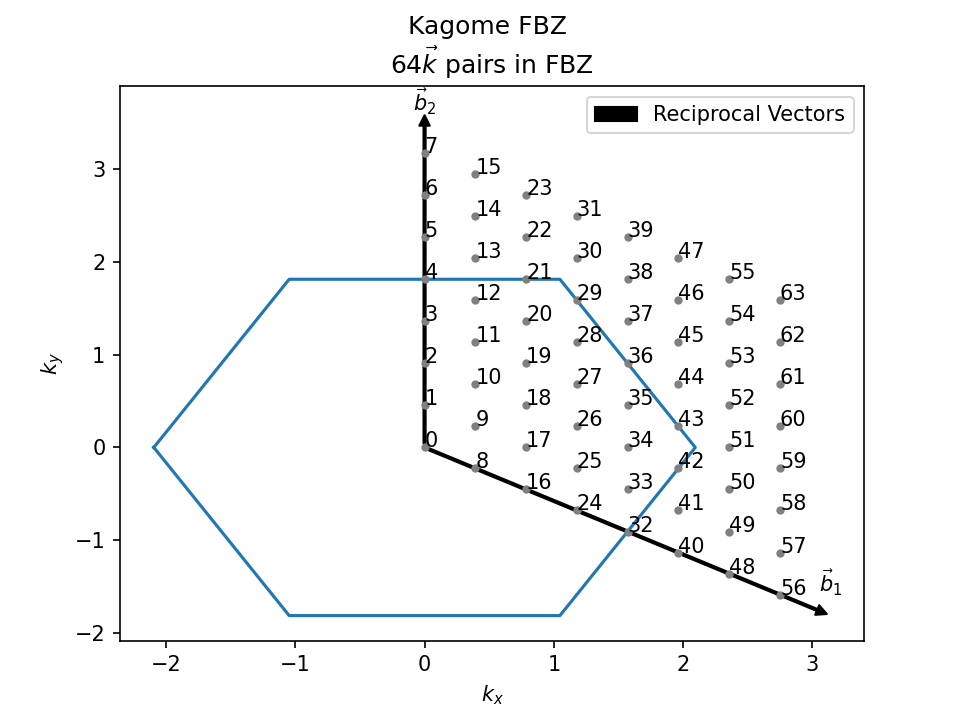

In [5]:
# Plotting of FBZ
ind = np.lexsort((K[:,1],K[:,0]))
K = K[ind] # FBZ noktalarının etkiketlenmesi için sıralama yaptım 

from shapely.geometry import Polygon, Point
# FBZ köşe noktaları (Elle hesapladım)
# https://www.researchgate.net/publication/2217014_The_Kagome_Antiferromagnet_A_Schwinger-Boson_Mean-Field_Theory_Study/figures?lo=1
poly = Polygon([(-2*np.pi/3,0), (-np.pi/3,np.pi/np.sqrt(3)), (np.pi/3,np.pi/np.sqrt(3)), (2*np.pi/3,0), (np.pi/3,-np.pi/np.sqrt(3)), (-np.pi/3,-np.pi/np.sqrt(3))])


#!! K'ları -N1'den N1 ve -N2'den N2'ye alınca dışarıdaki noktaları FBZ içine taşımak için:
# # FBZ içindeki k noktalarını seçme algoritması
# k=np.zeros((0,2))
# for j in range(len(K)):
#     if Point(K[j,0],K[j,1]).within(poly):
#         k=np.append(k,np.array([[K[j,0],K[j,1]]]),axis=0) 
# Bu algoritma istediğimiz sayıda k noktası vermiyor, dolayısıyla
# aşağıda manuel olarak eksik sayıda noktaları ekliyoruz:
# Aç/Kapa
# # N1=N2=2
# k=np.append(k,np.array([[K[5,0],K[5,1]]]),axis=0)
# k=np.append(k,np.array([[K[6,0],K[6,1]]]),axis=0)
# k=np.append(k,np.array([[K[11,0],K[11,1]]]),axis=0)
##N1=N2=3
# k=np.append(k,np.array([[K[16,0],K[16,1]]]),axis=0)
# k=np.append(k,np.array([[K[8,0],K[8,1]]]),axis=0)
##N1=N2=4 iken FBZ içinde nokta seçimi
# k=np.append(k,np.array([[K[18,0],K[18,1]]]),axis=0)
# k=np.append(k,np.array([[K[20,0],K[20,1]]]),axis=0)
# k=np.append(k,np.array([[K[38,0],K[38,1]]]),axis=0)
##N1=N2=5
# k=np.append(k,np.array([[K[24,0],K[24,1]]]),axis=0)
# k=np.append(k,np.array([[K[23,0],K[23,1]]]),axis=0)
#N1=N2=6
# k=np.append(k,np.array([[K[81,0],K[81,1]]]),axis=0)
# k=np.append(k,np.array([[K[42,0],K[42,1]]]),axis=0)
# k=np.append(k,np.array([[K[56,0],K[56,1]]]),axis=0)
# k=np.append(k,np.array([[K[39,0],K[39,1]]]),axis=0)
# k=np.append(k,np.array([[K[100,0],K[100,1]]]),axis=0)
#Biz N1 ve N2'yi sıfırdan başlattığımızdan bu algoritmaya gerek yok!
#!!

# FBZ görselleştirme
import matplotlib.pyplot as plt
%matplotlib notebook

fig, axs = plt.subplots()
coord = [[-2*np.pi/3,0], [-np.pi/3,np.pi/np.sqrt(3)], [np.pi/3,np.pi/np.sqrt(3)], [2*np.pi/3,0], [np.pi/3,-np.pi/np.sqrt(3)], [-np.pi/3,-np.pi/np.sqrt(3)]]
order = np.arange(len(K))
for i, txt in enumerate(order):
    axs.annotate(txt, (K[i,0], K[i,1]), fontsize=10)
coord.append(coord[0]) 
xs, ys = zip(*coord) 
axs.plot(xs,ys) 
plt.show() 
axs.plot(K[:,0],K[:,1],'.',color='gray')
#axs.scatter(k[:,0],k[:,1], color='red', label="Allowed pairs")  
import matplotlib.patches as patches
plt.annotate(r'$\vec{b}_1$', xy=(0, 0),xytext=(b1[0], b1[1]+0.25),horizontalalignment="center", fontsize=10)
plt.annotate(r'$\vec{b}_2$', xy=(0, 0),xytext=(b2[0], b2[1]),horizontalalignment="center" ,fontsize=10)
style = "Simple, tail_width=1, head_width=5, head_length=5"
kw = dict(arrowstyle=style, color="black")
arrow_origin = np.array([0,0])
arroww=patches.FancyArrowPatch(arrow_origin,np.array([b1[0],b1[1]]), connectionstyle="arc3,rad=0", **kw, label='Reciprocal Vectors')
arrowww=patches.FancyArrowPatch(arrow_origin,np.array([b2[0],b2[1]]), connectionstyle="arc3,rad=0", **kw)
axs.add_patch(arroww)
axs.add_patch(arrowww)
plt.title("Kagome FBZ \n"+str(N1*N2)+r"$\vec{k}$"+" pairs in FBZ")
plt.xlabel(r"$k_x$");plt.ylabel(r"$k_y$")
axs.legend(loc="upper right", scatterpoints=1, fontsize=10)

In [6]:
#FBZ içindeki k noktlarının enerjileri
#İzinli k noktaları aslında FBZ içinde değil! Ama biz E'leri karşılaştırdığımız için
#sorun yaratmaz, çünkü noktaları sadece b1 ve sadece b2 kullanarak FBZ içindeki
#karşılık gelen noktalara eşitlerdir.
E_mom=np.array([])
for i in range(len(K)):
    kx_mom=K[i,0];ky_mom=K[i,1]
    # H matrisindeki her bir atlamalar Bravais vektörleri ile değil, basislerle olur.
    # Yani her bir atlama vektörü (basis) Bravais vektörlerin yarısıdır, çünkü atomlar orada.
    #H matrisindeki her bir atlamalar Bravais vektörleri ile değil, basislerle olur.
    #Her bir atlama vektörü Bravais vektörlerin yarısıdır:
    # k1 = 1*kx  -> a1=(1,0) 
    # k2 = kx*1/2 + ky*sqrt(3)/2 -> a2=(1/2,sqrt(3)/2) 
    # k3 = k2 - k1
    k1_mom=kx_mom;k2_mom=kx_mom/2+ky_mom*np.sqrt(3)/2;k3_mom=k2_mom-k1_mom
    w_mom,U_mom=np.linalg.eig(Hamiltonian(k1_mom,k2_mom,k3_mom))
    E_mom=np.append(E_mom,w_mom,axis=0)
E_mom=np.real(np.sort(E_mom))

<IPython.core.display.Javascript object>


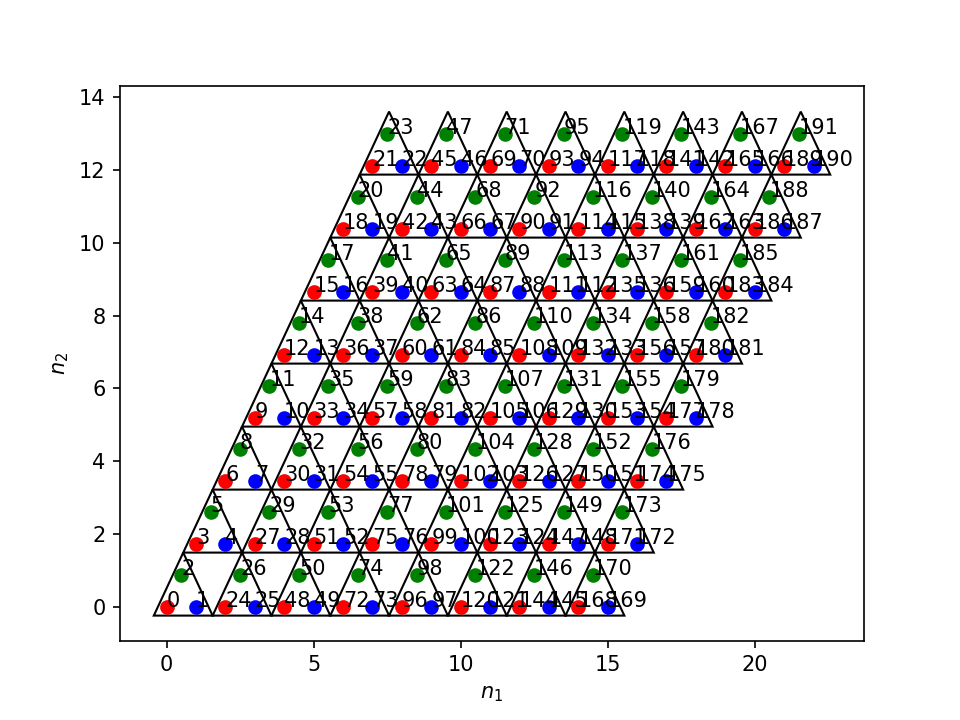

<IPython.core.display.Javascript object>


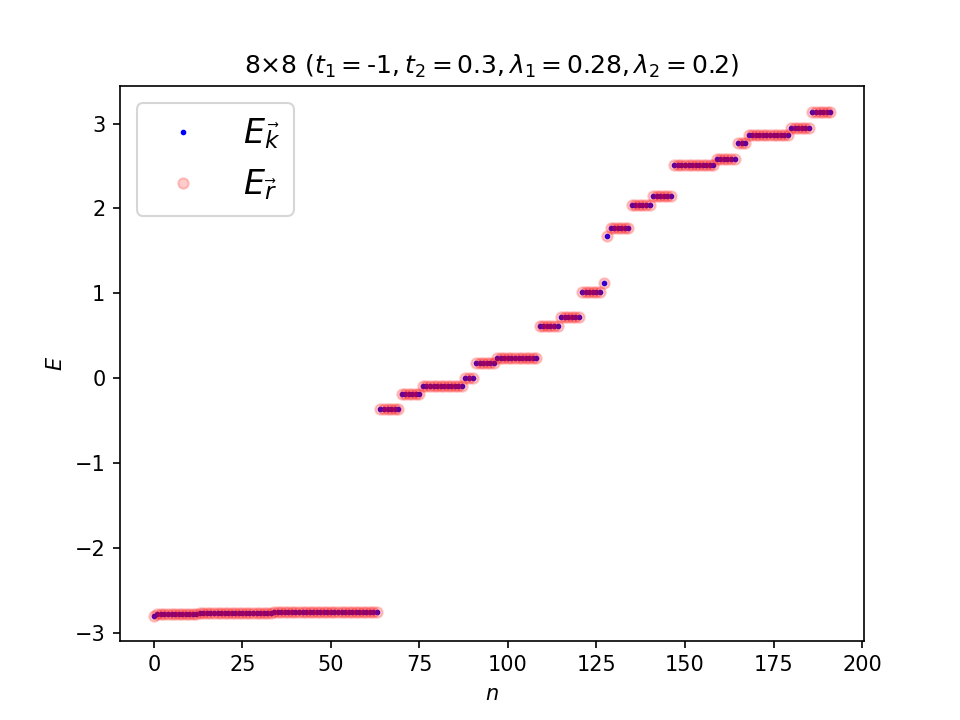

C:\Users\Can\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [7]:
#FBZ enerjilerinin konum uzayı ile karşılaştırılması
#Karşılaştırma için momentum ve real-space E'leri aynı sayıda olmalı. Yani k-pair sayısı kadar real-space'de site sayısı olmalı.
#Diğer bir deyişle buradaki N1 ve N2 sırasıyla L_x ve L_y'e eşit olmalı.

sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Kagome')
from Real_Kagome_Lattice_v2 import *

fig5, ax5 = plt.subplots()
idx_1 = np.argsort(E_mom)
sorted_1 = E_mom[idx_1]

x_sort = np.arange(0, len(E_mom), 1)
y_sort = sorted_1

ax5.plot(x_sort, y_sort, 'bo', markersize=1.7, label=r"$E_\vec{k}$")

y_sort_real,v = np.linalg.eig(H)
idx_2 = np.argsort(y_sort_real)
sorted_2 = y_sort_real[idx_2]
y_sort_real = sorted_2
ax5.plot(x_sort, y_sort_real, 'ro', markersize=5, alpha=0.2,label=r"$E_\vec{r}$")

ax5.set_title(str(N1)+r"$\times $"+str(N2)+r" $(t_1=$"+str(t1)+r"$,t_2=$"+str(t2)+r"$,\lambda_1=$"+str(L1)+r"$,\lambda_2=$"+str(L2)+r"$)$")
ax5.set_xlabel(r"$n$")
ax5.set_ylabel(r"$E$")
plt.legend(prop={'size': 16})